<a href="https://colab.research.google.com/github/TemaG33/Analiz_telecom_users/blob/main/telecom_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# загрузка данных
data=pd.read_csv('telecom_users.csv')
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
  customerID – id клиента
     gender – пол клиента (male/female)
     SeniorCitizen – яляется ли клиент пенсионером (1, 0)
     Partner – состоит ли клиент в браке (Yes, No)
     Dependents – есть ли у клиента иждивенцы (Yes, No)
     tenure – сколько месяцев человек являлся клиентом компании
     PhoneService – подключена ли услуга телефонной связи (Yes, No)
     MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
     InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
     OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
     OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
     DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
     TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
     StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
     StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
     Contract – тип контракта клиента (Month-to-month, One year, Two year)
     PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
     PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
     MonthlyCharges – месячный размер оплаты на настоящий момент
     TotalCharges – общая сумма, которую клиент заплатил за услуги за все время
     Churn – произошел ли отток (Yes or No)

SyntaxError: ignored

In [ ]:
# информация
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
# статистика по числовым признакам
data.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


# Рассмотрим некоторые признаки более детально

In [ ]:
#кол-во действующих и недействующих клиентов
data.groupby(['Churn'])['customerID'].nunique()

Churn
No     4399
Yes    1587
Name: customerID, dtype: int64

<Axes: ylabel='customerID'>

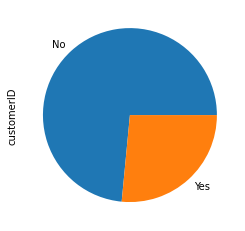

In [ ]:
data.groupby(['Churn'])['customerID'].nunique().plot(kind='pie', y='Churn')

#Пол клиентов


<Axes: ylabel='customerID'>

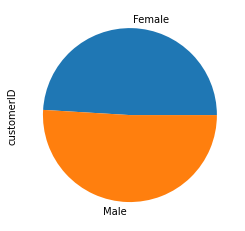

In [ ]:
data.groupby(['gender'])['customerID'].nunique().plot(kind='pie', y='gender')

# **SeniorCitizen**

<Axes: ylabel='customerID'>

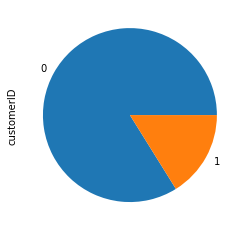

In [ ]:
#SeniorCitizen
data.groupby(['SeniorCitizen'])['customerID'].nunique().plot(kind='pie', y='SeniorCitizen')

# **tenure**

<Axes: ylabel='Frequency'>

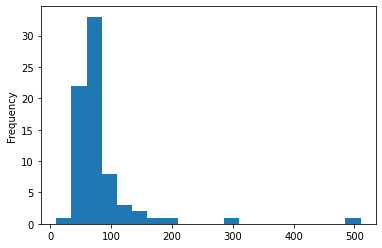

In [ ]:
#tenure
data.groupby(['tenure'])['customerID'].nunique().plot(kind='hist',bins=20, y='tenure')

In [ ]:
data.groupby(['tenure'])['customerID'].nunique()

tenure
0      10
1     510
2     194
3     169
4     154
     ... 
68     89
69     77
70     90
71    152
72    308
Name: customerID, Length: 73, dtype: int64

<Axes: xlabel='InternetService'>

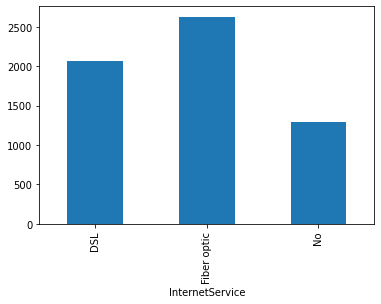

In [ ]:
#InternetService
data.groupby(['InternetService'])['customerID'].nunique().plot(kind='bar', y='InternetService ')


In [ ]:
#InternetService
data.groupby(['InternetService'])['customerID'].nunique()

InternetService
DSL            2068
Fiber optic    2627
No             1291
Name: customerID, dtype: int64

In [ ]:
# дублируем данные
d=data

In [ ]:
# выделим колонки с категориями
colums_=data.describe(include=[object]).columns


colums=np.delete(colums_.values,(0,16,15) )
colums

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn'],
      dtype=object)

gender
Female    2936
Male      3050
Name: customerID, dtype: int64
----------------------
Partner
No     3082
Yes    2904
Name: customerID, dtype: int64
----------------------
Dependents
No     4195
Yes    1791
Name: customerID, dtype: int64
----------------------
PhoneService
No      590
Yes    5396
Name: customerID, dtype: int64
----------------------
MultipleLines
No                  2848
No phone service     590
Yes                 2548
Name: customerID, dtype: int64
----------------------
InternetService
DSL            2068
Fiber optic    2627
No             1291
Name: customerID, dtype: int64
----------------------
OnlineSecurity
No                     2982
No internet service    1291
Yes                    1713
Name: customerID, dtype: int64
----------------------
OnlineBackup
No                     2605
No internet service    1291
Yes                    2090
Name: customerID, dtype: int64
----------------------
DeviceProtection
No                     2640
No internet service  

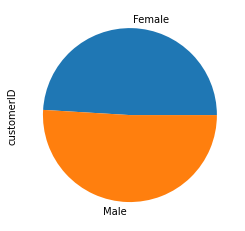

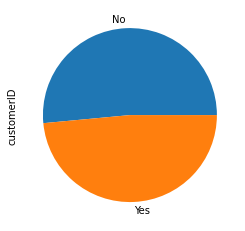

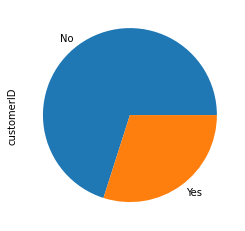

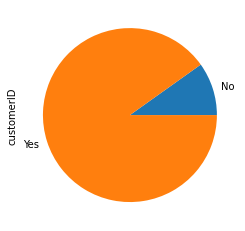

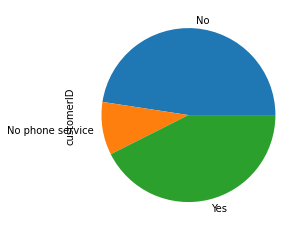

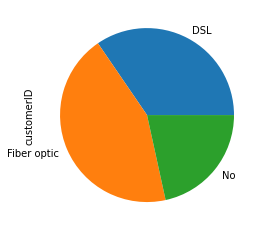

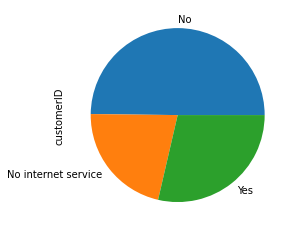

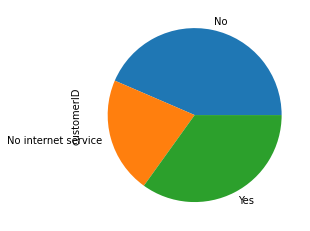

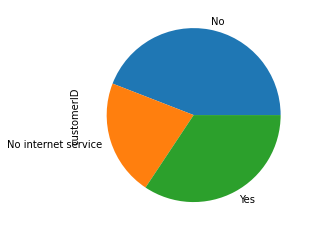

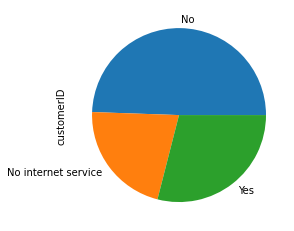

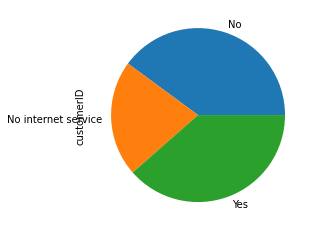

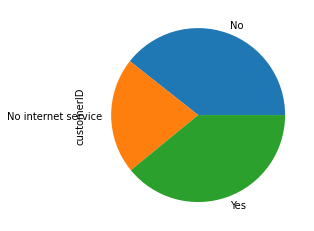

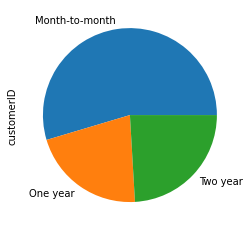

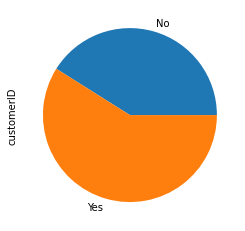

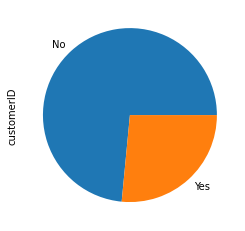

In [ ]:
# посмотрим на соотношение груп в разных фичах
for i in colums:
   print(data.groupby([i])['customerID'].nunique())
   fig,ax =plt.subplots()
   data.groupby([i])['customerID'].nunique().plot(kind='pie', y=i)
   print("----------------------")

Корреляционный анализ — метод обработки статистических данных, с помощью которого измеряется теснота связи между двумя или более переменными. Корреляционный анализ тесно связан с регрессионным анализом (также часто встречается термин «корреляционно-регрессионный анализ», который является более общим статистическим понятием), с его помощью определяют необходимость включения тех или иных факторов в уравнение множественной регрессии, а также оценивают полученное уравнение регрессии на соответствие выявленным связям.
Измеряеться от -1 (обратная зависимость) до 1 обратная зависимость. 0- зависимость не выявлена.


In [ ]:
# переведем категориальные признаки в числовые.

from sklearn.preprocessing import LabelEncoder
colums_=data.describe(include=[object]).columns
colums=np.delete(colums_.values,(0,1) )

for i in colums:
  labelencoder = LabelEncoder()
  d[i] = labelencoder.fit_transform(data[i].values)

In [ ]:
d

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,1,1,72,1,2,2,...,1,1,1,1,2,0,1,24.10,1066,0
1,4528,9688-YGXVR,Female,0,0,0,44,1,0,1,...,2,0,2,0,0,1,1,88.15,2901,0
2,6344,9286-DOJGF,Female,1,1,0,38,1,2,1,...,0,0,0,0,0,1,0,74.95,2126,1
3,6739,6994-KERXL,Male,0,0,0,4,1,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,432,2181-UAESM,Male,0,0,0,2,1,0,0,...,2,0,0,0,0,0,2,53.45,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,1,0,1,1,0,1,...,0,0,2,2,0,1,2,95.00,5540,1
5982,5191,5982-PSMKW,Female,0,1,1,23,1,2,0,...,2,2,2,2,2,1,1,91.10,1561,0
5983,5226,8044-BGWPI,Male,0,1,1,12,1,0,2,...,1,1,1,1,0,1,2,21.15,2290,0
5984,5390,7450-NWRTR,Male,1,0,0,12,1,2,1,...,2,0,2,2,0,1,2,99.45,322,1


<Axes: >

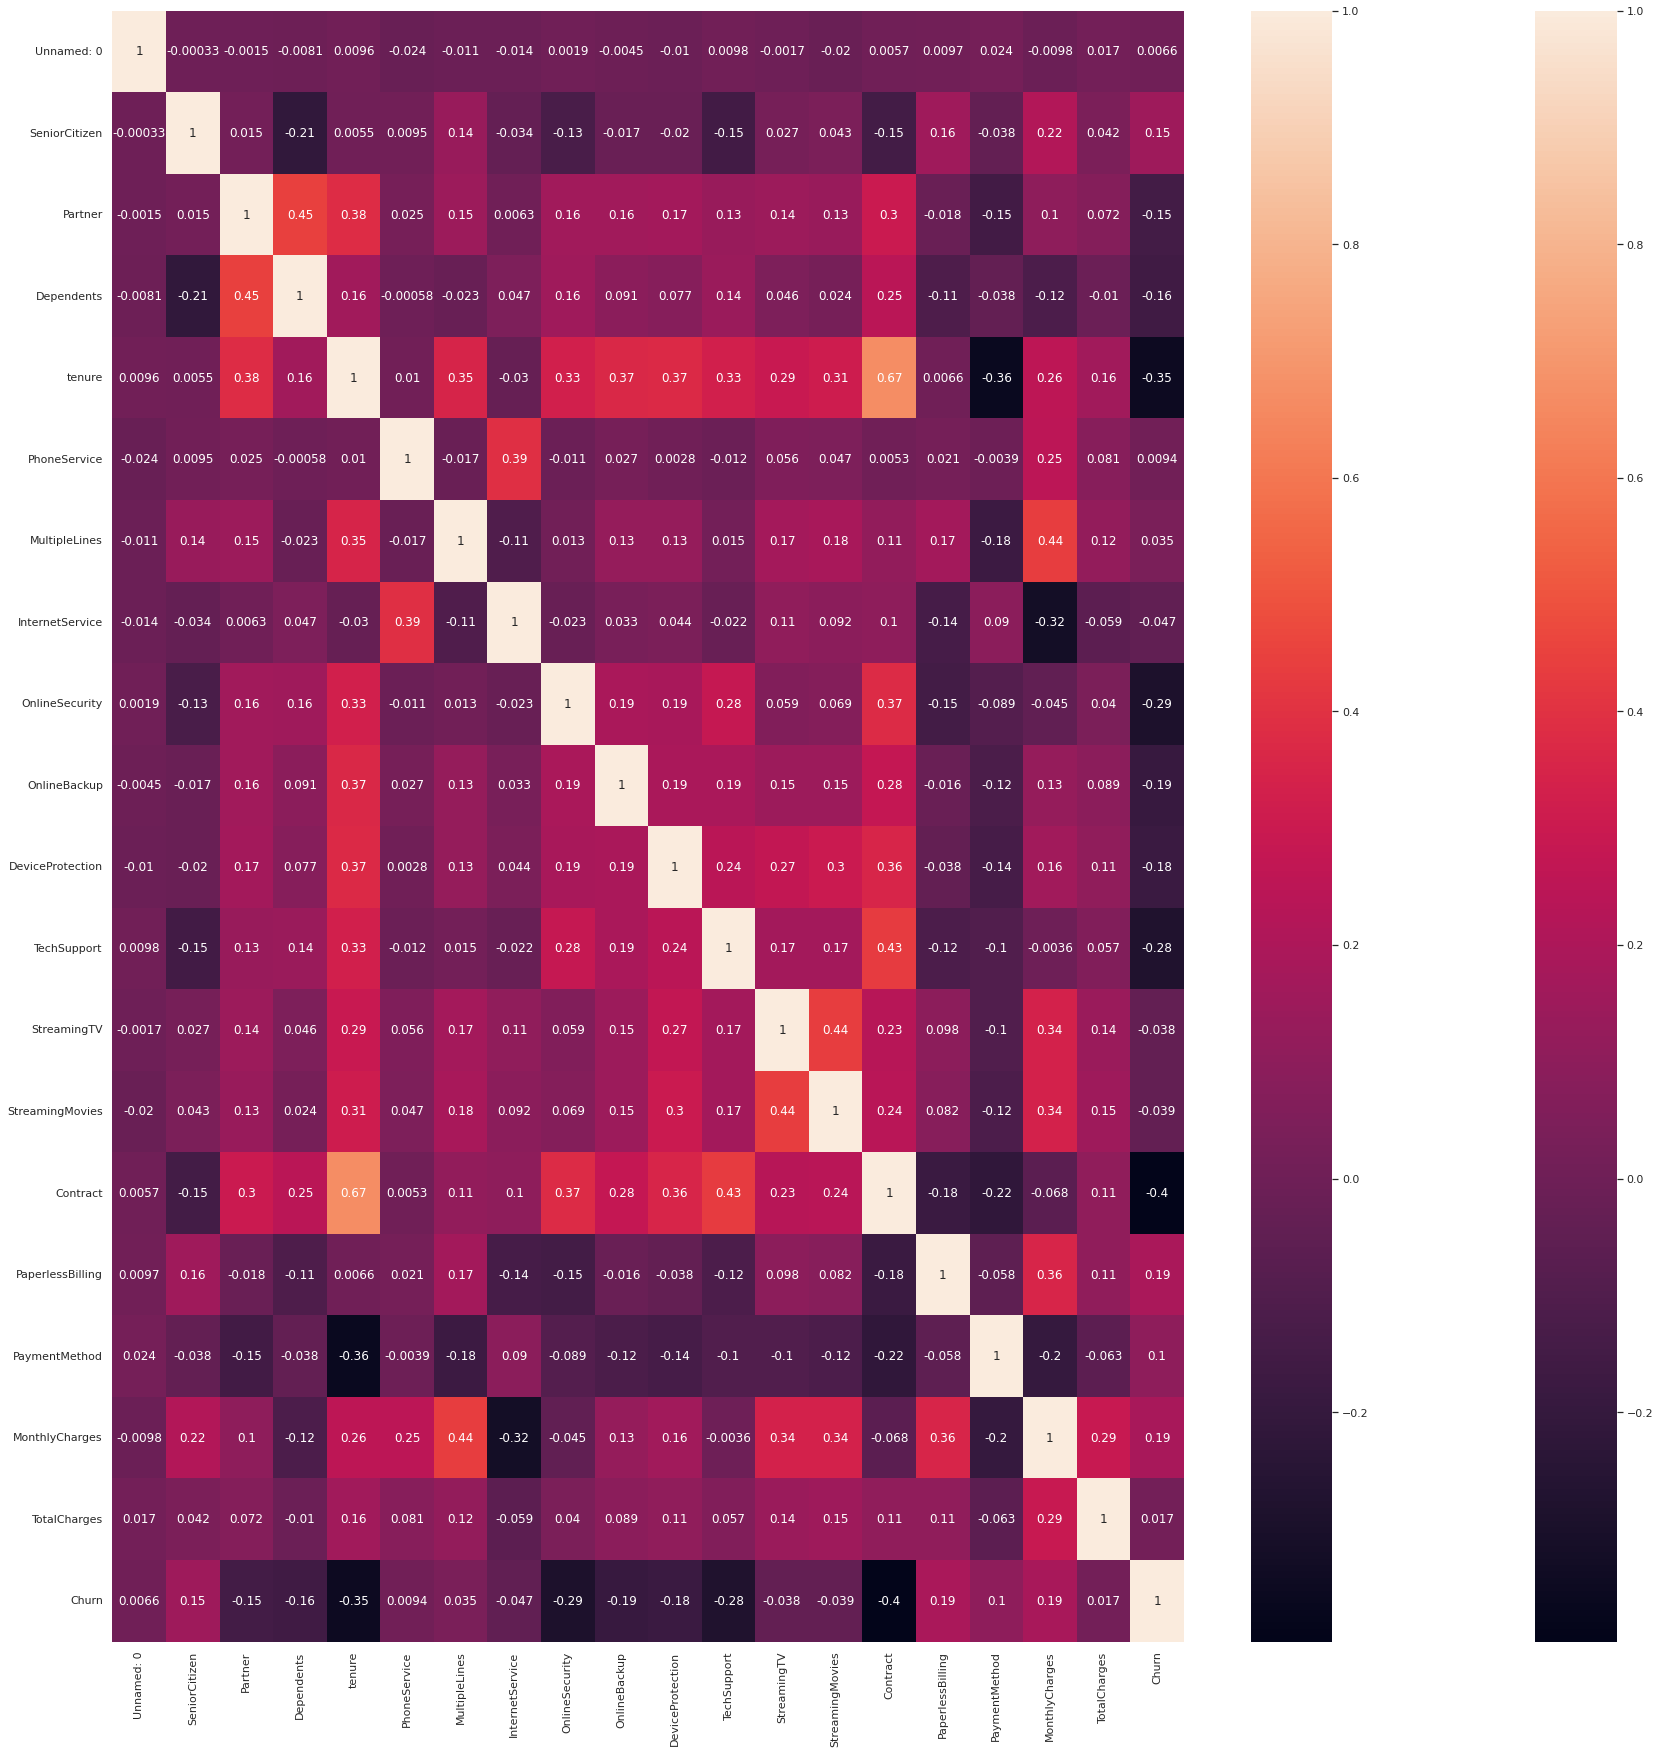

In [ ]:
# Построим тепловую схему для определения зависимостей
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(d.corr())
sns.heatmap(d.corr(),annot = True)

из схемы видно наибольшую связь с Churn (оттоком ) имеют такие показатели как:

tenure – сколько месяцев человек являлся клиентом компании(-0,35)

OnlineSecurity – подключена ли услуга онлайн-безопасности(-0,29)  

TechSupport – подключена ли услуга технической поддержки (-0,28)

Contract – тип контракта клиента (-0,4)
____________________________________________

чуть меньше связь имеют такие показатели как :

SeniorCitizen – яляется ли клиент пенсионером (0,15)

Partner – состоит ли клиент в браке (-0,15)

Dependents – есть ли у клиента иждивенцы (-0,16)


  Поскольку, как сказано выше, сильной зависимости не выявлено ни с 1-м признаком, для построения модели имеет смысл выделить признаки с наибольшей из имеющейся корыляцией. разделим их на 2 группы.
  В первую (основную) группу включим 4 фича с наибольшей зависимостью, это: tenure,OnlineSecurity,TechSupport,Contract.

  Гипотеза, этой группы звучит так :**Наиболе вероятный отказ от услуг будет у клиента с наименьшим tenure, с выключеными OnlineSecurity,TechSupport и наименьшим заключенным контрактом ***

Во 2-ю (дополнительную) группу включим 3 признака SeniorCitizen,Partner,Dependents,где корыляция на порядок ниже.

  Гипотеза 2-й группы: ***Наиболее вероятный отказ можно ожидать от клиента - пенсионера, с партнером и иждевенцом***

Создадим модели и проверим их работу с основной и дополнительной группой признаков



# Построение и сравнение моделей.
 попробуем применить стекинг, где в качестве базовых алгоритмов будут: Лес,Логистическая регрессия, Метод векторов,Градиентный классификатор. в качестве мета алгоритма будет: XGBClassifier

In [ ]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

# параметры базовых алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2) }

lr_params = {'C': np.arange(0.5, 1, 0.1)}

skf= StratifiedKFold(n_splits=5, random_state=17,shuffle=True)

In [ ]:
#  создаем базовые модели

gbc=GradientBoostingClassifier(random_state=17)
rfc=RandomForestClassifier(random_state=17)
svc=SVC(random_state=17,probability=True)
lr=LogisticRegression(random_state=17)

#  список моделей и список их параметров
models=[rfc,gbc,svc,lr]
models_params=[rfc_params,gbc_params,svc_params,lr_params,]

In [ ]:
#  модифицированная My_GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def My_GridSearchCV (X,y,mod,params_,cv_):
  if params_ is None:
    return mod
  GSCV = GridSearchCV( mod,params_,scoring='roc_auc',cv=cv_)
  GSCV.fit(X,y)
  return GSCV.best_estimator_

В задачах машинного обучения для оценки качества моделей и сравнения различных алгоритмов используются метрики, а их выбор и анализ — непременная часть работы датасатаниста.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR):


$\large TPR = \frac{TP}{TP + FN}$


$\large FPR = \frac{FP}{FP + TN}$


TPR - полнота, а FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

**Посмотрим основную группу фичей на базовых алгоритмах**

При простом случайном разделении на тренировочное и тестовое множества (как в примерах выше) может случиться так, что распределения тренировочного и тестового множеств окажутся не такими, как у всего исходного множества.чтобы это устранить добавим параметр stratify=train_targets в функцию по разделению датасета train_test_split

In [ ]:
# разбиение датасета
from sklearn.metrics import accuracy_score

train_targets = data['Churn']
train_values = d[['tenure','OnlineSecurity','TechSupport','Contract']]

x_train, x_test, y_train, y_test = train_test_split(train_values,
                                                    train_targets,
                                                    test_size=0.3,
                                                    random_state=17,
                                                    stratify=train_targets)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

new_model=[]
for i in range(len(models)):
  new_model.append(My_GridSearchCV(x_train,y_train,models[i],models_params[i],5))
  predictt=new_model[i].predict_proba(x_test)
  predictt=predictt[:, 1]
  roc_auc_score_ = roc_auc_score(y_test,predictt)
  print(new_model[i])
  print(f'roc_auc_score : {roc_auc_score_}')

RandomForestClassifier(min_samples_leaf=4, n_estimators=90, random_state=17)
roc_auc_score : 0.7977256811815636
GradientBoostingClassifier(random_state=17)
roc_auc_score : 0.8202556022408964
SVC(C=0.30000000000000004, kernel='linear', probability=True, random_state=17)
roc_auc_score : 0.802204290807232
LogisticRegression(C=0.8999999999999999, random_state=17)
roc_auc_score : 0.8133395403615992


Посмотрим как поведут себя базовые алгоритмы на добавление дополнительной группы фичей

In [ ]:
# разбиение датасета


train_targets = data['Churn']
train_values = d[['tenure','OnlineSecurity','TechSupport','Contract','SeniorCitizen','Partner','Dependents']]

x_train1, x_test1, y_train1, y_test1 = train_test_split(train_values,
                                                    train_targets,
                                                    test_size=0.3,
                                                    random_state=17,
                                                    stratify=train_targets)

In [ ]:

new_model=[]
for i in range(len(models)):
  new_model.append(My_GridSearchCV(x_train1,y_train1,models[i],models_params[i],5))
  predictt=new_model[i].predict_proba(x_test1)
  predictt=predictt[:, 1]
  roc_auc_score_ = roc_auc_score(y_test1,predictt)
  print(new_model[i])
  print(f'roc_auc_score : {roc_auc_score_}')

RandomForestClassifier(min_samples_leaf=4, n_estimators=90, random_state=17)
roc_auc_score : 0.8093893239113827
GradientBoostingClassifier(random_state=17)
roc_auc_score : 0.8290663992869877
SVC(C=0.1, kernel='linear', probability=True, random_state=17)
roc_auc_score : 0.8013257575757576
LogisticRegression(C=0.8999999999999999, random_state=17)
roc_auc_score : 0.817366151005857


# Вывод № 1!
 Несмотря на слабую корыляцию признаков "по одиночке", группы признаков дали неплохой результат на всех 4-х базовых алгоритмах, но наиболее лучший алгоритм GradientBoostingClassifier(random_state=17) (ниже привидена визуализация метрики этого алгоритма)
roc_auc_score : 0.8290663992869877, также можно отметить что 2-я группа признаков пусть и незначительно, но улучшила показатели алгоритмов


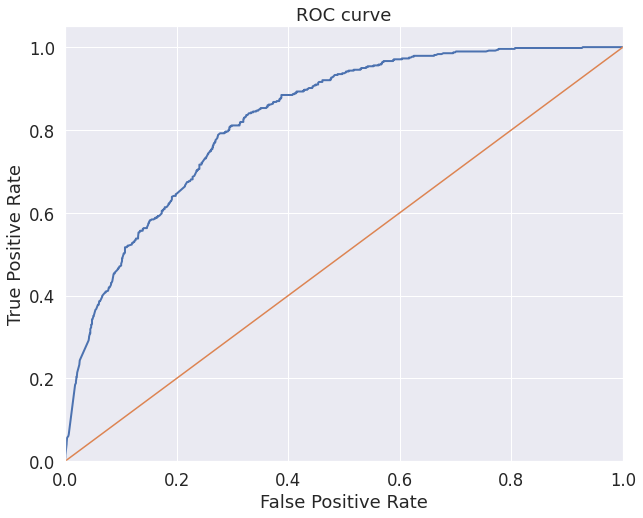

In [ ]:

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test1,new_model[1].predict_proba(x_test1)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Чем больше площадь под кривой - тем точнее модель

**Посмотрим на работу металгоритма**

In [ ]:
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

In [ ]:
# создаем матрицу метапризнаков
meta_mtrx = np.empty((y_train1.shape[0], 4),dtype=int )

for i in range(len(new_model)):
  meta_mtrx[:,i]=new_model[i].predict(x_train1)

meta_mtrx

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 0, 1],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 1]])

In [ ]:
#!!!!!!!!!!!!!!!!! Долгое исполнение кода,готовые данные ниже !!!!!!!!!!!!! Долгое исполнение кода,готовые данные ниже!!!!!!!!!!!!!!Долгое исполнение кода!!!!!!!!!!!!!!!!!
# НЕ ИСПОЛНЯТЬ
# подбор параметров мета функции dtype=object


xgb = XGBClassifier(random_state=17, cv=5)
grid_xgb = GridSearchCV(xgb, param_grid=xgb_params,cv = 5)
model_xgb = grid_xgb.fit(meta_mtrx,y_train1)
besMod_parm=model_xgb.best_params_
besMod=model_xgb.best_estimator_

Выходные данные были обрезаны до нескольких последних строк (5000).
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

[23:21:19] WARNI

In [ ]:
besMod

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cv=5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=45, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
besMod_parm

{'eta': 0.4,
 'min_child_weight': 8,
 'n_estimators': 45,
 'subsample': 0.30000000000000004}

In [ ]:

# НЕ ИСПОЛНЯТЬ !!!!! результат функции выше)

XGBClassifier
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cv=5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=45, n_jobs=None,
              num_parallel_tree=None, ...)

{'eta': 0.4,
 'min_child_weight': 8,
 'n_estimators': 45,
 'subsample': 0.30000000000000004}

In [ ]:
# создаем матрицу метапризнаков
meta_mtrx_test = np.empty((y_test1.shape[0], 4),dtype=int )

for i in range(len(new_model)):
  meta_mtrx_test[:,i]=new_model[i].predict(np.array(x_test1.values))

meta_mtrx_test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1]])

In [ ]:
# сделаем предсказание метаалгоритмом и оценим это предсказание

besMod.fit(meta_mtrx,y_train)
predictTest=besMod.predict(meta_mtrx_test)
roc_auc_score_ = roc_auc_score(y_test1,predictTest)
print(besMod)
print(f'roc_auc_score : {roc_auc_score_}')

[23:24:47] WARNING: ../src/learner.cc:767: 
Parameters: { "cv" } are not used.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cv=5, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, n_estimators=45, n_jobs=None,
              num_parallel_tree=None, ...)
roc_auc_score : 0.6622708174178763


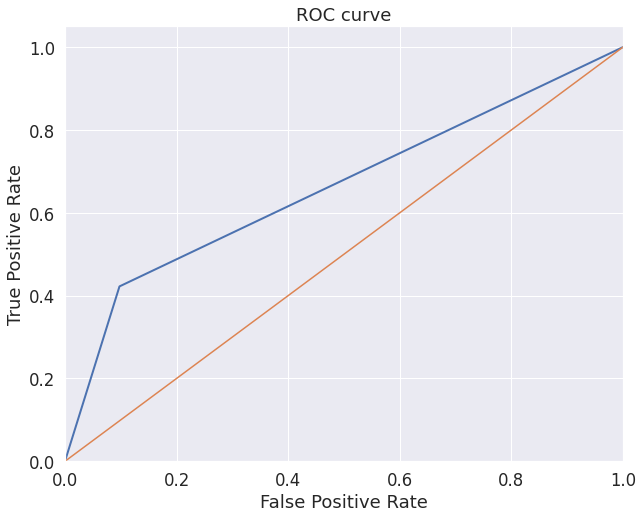

In [ ]:
# визуализация
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test1,predictTest, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

При сравнении "roc_auc_score" мета алгоритма  с ранее обучеными базовыми алгоритмами, можно заметить, что качестов модели не улучшилось, т.е стекинг себя не оправдал, проверим это утверждение на обученой модели векторов:

In [ ]:
pred2=new_model[1].predict(x_test1)
roc_auc_score_ = roc_auc_score(y_test1,predictTest)
print(roc_auc_score_ )

0.779510022271715

# Общий вывод
Наиболее значимые признаки для определения оттока клиентов:tenure,OnlineSecurity,TechSupport,Contract.
Наиболее подходящая модель предсказания-GradientBoostingClassifier .

Для сохранения клиентов, компании рекомендуеться, уделять внимание интернет безопасности, поддержке,и заключению долгосрочных контрактов.

